In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


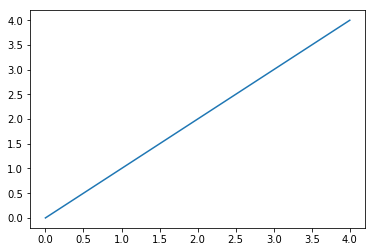

In [2]:
plot(arange(5))

In [7]:
import requests 
import pandas as pd
import json
import numpy as np
import matplotlib as plt
from pandas.io.json import json_normalize

In [4]:
baseUrl = "https://opendata.lillemetropole.fr/api/records/1.0/search/?dataset="
paramUrl = "&rows=120"
# on définit une liste vide qui sera incrémentée à chaque nouvelle dataframe
dataFrames = []
# dictionnaire numéroté pour concaténer l'url avec les nom de services à analyser
services = { 0: "bureaux-de-poste",
             1: "localisation-hopitaux",
             2: "magasins-et-boutiques",
             3: "cinemas-theatres-mel",
             4: "adresse-et-geolocalisation-des-etablissements-denseignement-du-premier-et-second",
}
# pour chaque service, la boucle créé l'url d'appel correspondant puis normalise le résultat du json et le classe dans une dataframe
for i in range(5):
 urlApi = baseUrl + services[i] + paramUrl
 dataFrames.append(pd.DataFrame.from_dict(pd.io.json.json_normalize(json.loads(requests.get(urlApi).text)['records']), orient='columns'))


In [5]:
dataFrames[0].head(10)

,datasetid,fields.code_postal,fields.commune,fields.geo_point_2d,fields.geometry.coordinates,fields.geometry.type,fields.libelle,fields.objectid,geometry.coordinates,geometry.type,record_timestamp,recordid
0,bureaux-de-poste,59150,WATTRELOS,"[50.703545071172, 3.2352637437863]","[3.2352637437863, 50.703545071172]",Point,LA POSTE BEAULIEU,1880,"[3.2352637437863, 50.703545071172]",Point,2017-11-28T19:00:35+00:00,956bfba6ae198609cd9e5efecffdbe3d412330c3
1,bureaux-de-poste,59120,LOOS,"[50.615027489749, 3.0120537705089]","[3.0120537705089, 50.615027489749]",Point,LA POSTE,1114,"[3.0120537705089, 50.615027489749]",Point,2017-11-28T19:00:35+00:00,fcead47a238d8e2adc3806c2c4c5475add635aab
2,bureaux-de-poste,59120,LOOS,"[50.606371620201, 3.0087921128636]","[3.0087921128636, 50.606371620201]",Point,LA POSTE LES OLIVEAUX,1087,"[3.0087921128636, 50.606371620201]",Point,2017-11-28T19:00:35+00:00,b295972fc9c689a2a8b685408fa3fbbe6c6470a4
3,bureaux-de-poste,59260,LEZENNES,"[50.614201599495, 3.1128628265344]","[3.1128628265344, 50.614201599495]",Point,LA POSTE,850,"[3.1128628265344, 50.614201599495]",Point,2017-11-28T19:00:35+00:00,be8fafa78d72b6034641a70e8ea4c39a8ab636e3
4,bureaux-de-poste,59790,RONCHIN,"[50.607749999571, 3.0817345250781]","[3.0817345250781, 50.607749999571]",Point,LA POSTE,1365,"[3.0817345250781, 50.607749999571]",Point,2017-11-28T19:00:35+00:00,3146daac1d453099658a2f2268fca4fb84dc6ff3
5,bureaux-de-poste,59263,HOUPLIN-ANCOISNE,"[50.569420990851, 2.9983775270643]","[2.9983775270643, 50.569420990851]",Point,LA POSTE,703,"[2.9983775270643, 50.569420990851]",Point,2017-11-28T19:00:35+00:00,54db06d270210f81d479f556d9dad265d558f4ff
6,bureaux-de-poste,59000,LILLE,"[50.632669692082, 3.0748408242202]","[3.0748408242202, 50.632669692082]",Point,POSTE (CENTRE REGIONAL),4253,"[3.0748408242202, 50.632669692082]",Point,2017-11-28T19:00:35+00:00,261cd4a61bbda73538178950a8d8843c2c4a9c41
7,bureaux-de-poste,59136,WAVRIN,"[50.572978406478, 2.9382155097977]","[2.9382155097977, 50.572978406478]",Point,LA POSTE,1943,"[2.9382155097977, 50.572978406478]",Point,2017-11-28T19:00:35+00:00,9b0192a9e2045fa533b5a2b66290ffe350a51fc9
8,bureaux-de-poste,59320,EMMERIN,"[50.593291223694, 3.0007080623128]","[3.0007080623128, 50.593291223694]",Point,LA POSTE,445,"[3.0007080623128, 50.593291223694]",Point,2017-11-28T19:00:35+00:00,396c9317d7c54b84aa18761b530298db448a262e
9,bureaux-de-poste,59155,FACHES-THUMESNIL,"[50.602232877748, 3.0697039926035]","[3.0697039926035, 50.602232877748]",Point,LA POSTE,484,"[3.0697039926035, 50.602232877748]",Point,2017-11-28T19:00:35+00:00,7288f1930d503b86c63443f87db2299b8d105638


In [10]:
dataFrames[0]['datasetid'].describe()

count                  117
unique                   1
top       bureaux-de-poste
freq                   117
Name: datasetid, dtype: object

In [12]:
dataFrames[0]['fields.commune'].value_counts()

LILLE                        18
ROUBAIX                       8
VILLENEUVE D'ASCQ             8
TOURCOING                     7
MARCQ-EN-BAROEUL              4
LAMBERSART                    3
WATTRELOS                     3
WASQUEHAL                     2
LOOS                          2
RONCQ                         2
CROIX                         2
LA MADELEINE                  2
HAUBOURDIN                    2
(LOMME) LILLE                 2
RONCHIN                       2
TEMPLEMARS                    1
SECLIN                        1
WATTIGNIES                    1
LA CHAPELLE D'ARMENTIERES     1
BAISIEUX                      1
HEM                           1
(HELLEMMES) LILLE             1
PERENCHIES                    1
SAINGHIN EN MELANTOIS         1
QUESNOY SUR DEULE             1
HOUPLIN-ANCOISNE              1
HOUPLINES                     1
BONDUES                       1
NOYELLES                      1
VERLINGHEM                    1
                             ..
FOURNES-

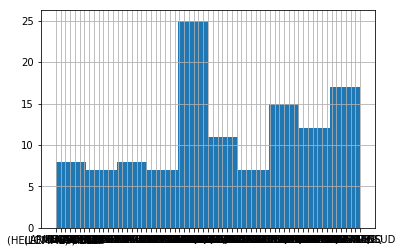

In [45]:
dataFrames[0]['fields.commune'].hist()

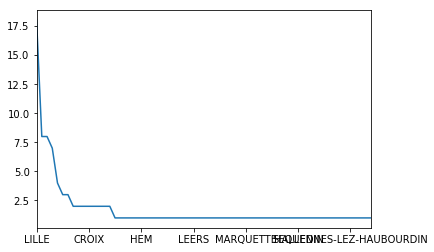

In [54]:
dataFrames[0]['fields.commune'].value_counts().plot()

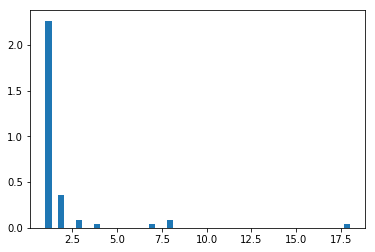

In [58]:
import numpy as np
import matplotlib.pyplot as plt

x = dataFrames[0]['fields.commune'].value_counts()

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(x, 50, normed=True)
fig.canvas.draw()
plt.show()